In [1]:
NAME: Dhobale Abhishek Santosh
ROLL NO. 16
COURSE: AI&DS
CLASS: BE
SUB:Computer Laboratory-I (DMV)

## Data Cleaning and Preparation 

In [1]:
# Problem Statement: Analyzing Customer Churn in a Telecommunications Company 
# Dataset: "Telecom_Customer_Churn.csv" 
# Description: The dataset contains information about customers of a telecommunications 
# company and whether they have churned (i.e., discontinued their services). The dataset 
# includes various attributes of the customers, such as their demographics, usage patterns, and 
# account information. The goal is to perform data cleaning and preparation to gain insights 
# into the factors that contribute to customer churn. 
# Tasks to Perform: 

### 1. Import the "Telecom_Customer_Churn.csv" dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Telco-Customer-Churn.csv")

### 2.  Explore the dataset to understand its structure and content. 

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 3.  Handle missing values in the dataset, deciding on an appropriate strategy.

In [6]:
# Convert "TotalCharges" to numeric, handling any conversion errors.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values in "TotalCharges."
df.dropna(subset=['TotalCharges'], inplace=True)


### 4. Remove any duplicate records from the dataset. 

In [7]:
# Remove duplicates
df.drop_duplicates(inplace=True)


### 5. Check for inconsistent data, such as inconsistent formatting or spelling variations,and standardize it.

In [8]:
# Check for inconsistent data by looking at unique values in each column
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique())
    print("\n")

Unique values in customerID:
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique values in gender:
['Female' 'Male']


Unique values in SeniorCitizen:
[0 1]


Unique values in Partner:
['Yes' 'No']


Unique values in Dependents:
['No' 'Yes']


Unique values in tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]


Unique values in PhoneService:
['No' 'Yes']


Unique values in MultipleLines:
['No phone service' 'No' 'Yes']


Unique values in InternetService:
['DSL' 'Fiber optic' 'No']


Unique values in OnlineSecurity:
['No' 'Yes' 'No internet service']


Unique values in OnlineBackup:
['Yes' 'No' 'No internet service']


Unique values in DeviceProtection:
['No' 'Yes' 'No internet service']


Unique values in TechSupport:
['No' 'Yes' 'No internet service']


Unique values i

In [9]:
# Example: Standardize 'Yes'/'No' to lowercase
df = df.apply(lambda col: col.map(lambda s: s.lower() if type(s) == str else s))


In [10]:
# Example: Standardize columns with similar values (e.g., 'Male'/'Female' to 'male'/'female')
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.lower()

In [11]:
# Display the first few rows after standardization
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-vhveg  female              0     yes         no       1           no   
1  5575-gnvde    male              0      no         no      34          yes   
2  3668-qpybk    male              0      no         no       2          yes   
3  7795-cfocw    male              0      no         no      45           no   
4  9237-hqitu  female              0      no         no       2          yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  no phone service             dsl             no  ...               no   
1                no             dsl            yes  ...              yes   
2                no             dsl            yes  ...               no   
3  no phone service             dsl            yes  ...              yes   
4                no     fiber optic             no  ...               no   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [12]:
# Save the cleaned data
df.to_csv('Telco-Customer-Churn-cleaned.csv', index=False)


### 6.  Convert columns to the correct data types as needed. 

In [13]:
# Convert columns to appropriate data types
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # Convert to numeric
df['Churn'] = df['Churn'].astype('category')  # Convert to category
df['tenure'] = df['tenure'].astype('int')  # Ensure tenure is integer


In [14]:
df.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int32
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

### 7. Identify and handle outliers in the data.

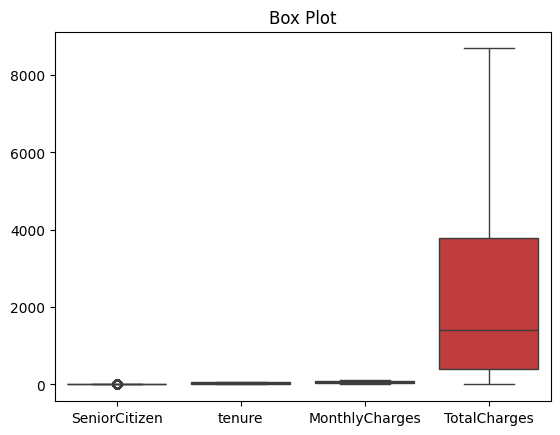

In [15]:
import seaborn as sns
# Box Plot
sns.boxplot(data=df)
plt.title("Box Plot")
plt.show()

### 8. Perform feature engineering, creating new features that may be relevant to predicting customer churn. 

In [16]:
# Create age group feature (replace thresholds as needed)
df['age_group'] = np.where(df['SeniorCitizen'] == 1, 'Senior', np.where(df['tenure'] > 60, 'Middle-aged', 'Young'))

# Feature creation based on numerical features
# Tenure groups (replace thresholds as needed)
df['tenure_group'] = np.where(df['tenure'] <= 12, 'New Customer', 'Loyal Customer')

# Average monthly spend
df['avg_monthly_spend'] = df['MonthlyCharges'] / df['tenure']



### 9.  Normalize or scale the data if necessary.

In [17]:
# Feature scaling or normalization (optional, consider data distribution)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'avg_monthly_spend'] # Adjust as needed
df[numerical_features] = scaler.fit_transform(df[numerical_features])



### 10. Split the dataset into training and testing sets for further analysis. 

In [18]:
from sklearn.model_selection import train_test_split

# Assuming your data is in a DataFrame named 'df' and your target variable is 'Churn' (replace if different)
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable

# Split data into training and testing sets (common split is 80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shapes:")
print(X_train.shape, y_train.shape)

print("Testing data shapes:")
print(X_test.shape, y_test.shape)


Training data shapes:
(5625, 23) (5625,)
Testing data shapes:
(1407, 23) (1407,)


In [19]:
#cleaned data is in a DataFrame named 'df'
df.to_csv('cleaned_data.csv', index=False)  # Export without index
print("Cleaned data exported to cleaned_data.csv")

Cleaned data exported to cleaned_data.csv
